# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Partho Protim | Das | Partho | 5 | 25 |
| Member 2: | Kajal Deb | Nath | Kajal | 5 | 25 |
| Member 3: | Shakil | Ahmed | Shakil | 5 | 25 |
| Member 4: | Rony | Paul | Rony | 5 | 25 |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

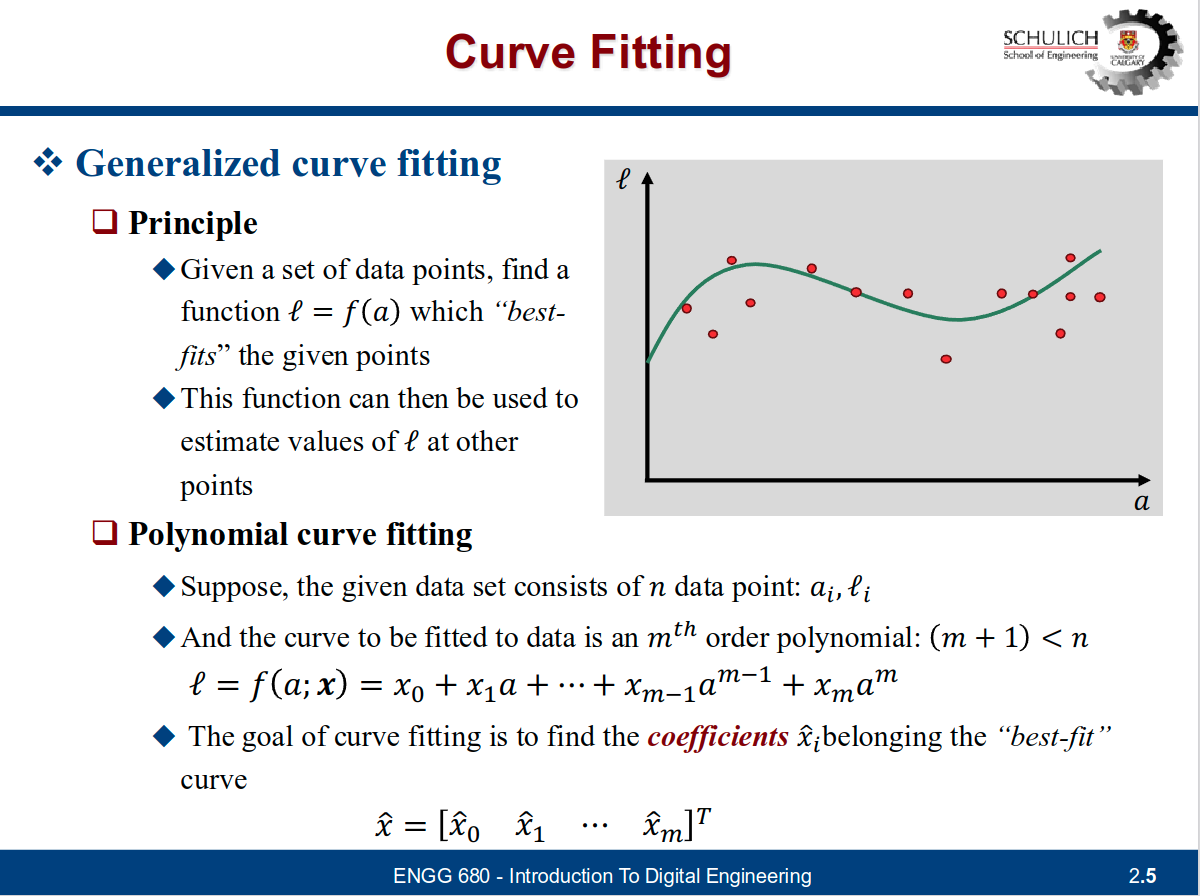

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [ ]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
from google.colab import drive
drive.mount('/content/drive')

df_data = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2/data.xlsx')
arr_data = df_data.to_numpy()
#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = arr_data[:, 0]
l_var = arr_data[:, 1]
l_true = arr_data[:, 2]
print (l)
print (l_var)
print (l_true)

Mounted at /content/drive
[-16.19488895 -15.93614373 -38.69059397 -15.76829142 -19.35466885
 -15.16497902 -15.49640085 -16.91724904 -17.52349248 -32.95407757
 -16.00065694 -25.04422086 -14.89213806 -15.7987726  -26.75754246
 -12.65445009 -23.50784906 -29.31586174 -19.82059135 -35.53546202
 -22.95534213 -27.76451016 -24.29809087 -20.97183964 -25.62832789
 -25.46742842 -30.93685254  -4.45364159 -22.54372279 -22.57232947
 -19.33225187 -28.72219969 -19.1445899  -22.82256126 -42.15746678
 -38.23550958 -27.6447096  -43.1840432  -28.78127217 -30.88732948
 -28.19835461 -22.70655014 -28.99935895 -29.76235334 -25.21827045
 -30.73885495 -20.311819   -25.37382489 -29.68141665 -29.53575172
  -1.95803693 -24.17929591  -6.8115061  -25.38256396 -34.40461913
 -34.04484698 -54.00966614 -27.37163115 -29.36169916 -36.1015048
 -36.70371735 -31.49194812 -45.16752227 -46.12253759 -26.16100716
 -32.41550088 -34.54670421 -57.87213239 -22.44069785 -40.72267515
 -31.02625237 -30.633867   -42.38364763 -38.1493398

In [ ]:
# step 3
# define the number of observation n
# (1 mark)
n = len(l)
print (n)
# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.identity(n)
print (P)
# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)
print (a)


500
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
[-3.14159265 -3.1290011  -3.11640955 -3.10381799 -3.09122644 -3.07863488
 -3.06604333 -3.05345178 -3.04086022 -3.02826867 -3.01567712 -3.00308556
 -2.99049401 -2.97790246 -2.9653109  -2.95271935 -2.94012779 -2.92753624
 -2.91494469 -2.90235313 -2.88976158 -2.87717003 -2.86457847 -2.85198692
 -2.83939536 -2.82680381 -2.81421226 -2.8016207  -2.78902915 -2.7764376
 -2.76384604 -2.75125449 -2.73866293 -2.72607138 -2.71347983 -2.70088827
 -2.68829672 -2.67570517 -2.66311361 -2.65052206 -2.6379305  -2.62533895
 -2.6127474  -2.60015584 -2.58756429 -2.57497274 -2.56238118 -2.54978963
 -2.53719807 -2.52460652 -2.51201497 -2.49942341 -2.48683186 -2.47424031
 -2.46164875 -2.4490572  -2.43646565 -2.42387409 -2.41128254 -2.39869098
 -2.38609943 -2.37350788 -2.36091632 -2.34832477 -2.33573322 -2.32314166
 -2.31055011 -2.29795855 -2.285367   -

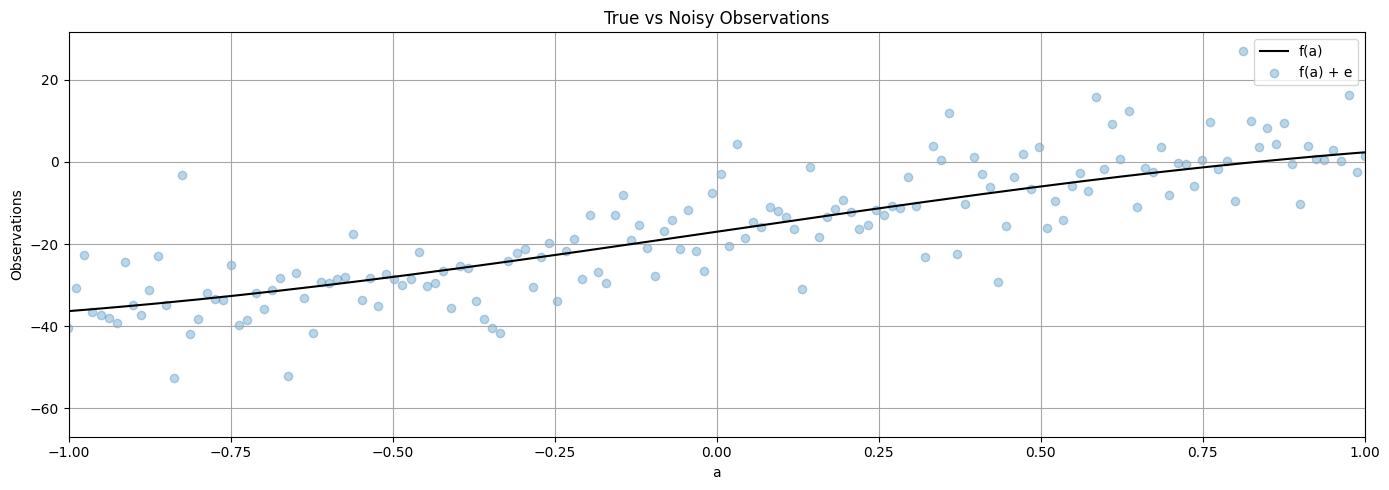

In [ ]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# Plot the true observation as a line plot
ax.plot(a, l_true, label="f(a)", color='k')  # 'k' is for black color
# Scatter plot for noisy observations
ax.scatter(a, l, label="f(a) + e", color='tab:blue', marker='o', alpha=0.3)
# Set axis labels
ax.set_xlabel("a")
ax.set_ylabel("Observations")

# Set title
ax.set_title("True vs Noisy Observations")
# Add legend
ax.legend()
# Scale the x-axis to range from -1 to 1
ax.set_xlim(-1, 1)

# Add grid
ax.grid(True, which='both', ls='-', color='0.65')
# Improve layout
fig.tight_layout()

# Display the plot
plt.show()
ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()

In [ ]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

import numpy as np

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data

    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posteriori variance factor (goodness of fit)
        v:              observation residuals
    '''

    #Construct the design matrix A (Vandermonde matrix for polynomial)
    A = np.vander(a, deg + 1, increasing=True)  # Shape: (n, deg+1)
    print("Design Matrix (A):")
    print(A)

    #Apply weighted least squares estimation
    AT = A.T

    #Compute the normal equation
    ATA = AT @ P @ A
    ATL = AT @ P @ l

    print("\nNormal Equations:")
    print("ATA:")
    print(ATA)
    print("ATL:")
    print(ATL)

    # Solve for the coefficients x (polynomial parameters)
    x = np.linalg.solve(ATA, ATL)  # This solves the linear system for x
    print("\nEstimated Polynomial Coefficients (x):")
    print(x)

    # Compute residuals v = l - A*x
    v = l - A @ x  # Residuals between the observed and predicted values
    print("\nResiduals (v):")
    print(v)

    #Calculate the a posteriori variance factor (apv)
    n = len(l)
    p = deg + 1
    apv = (v.T @ P @ v) / (n - p)
    print("\nA Posteriori Variance Factor (apv):")
    print(apv)

    #Compute covariance matrix of x (cov_x)
    cov_x = apv * np.linalg.inv(ATA)
    print("\nCovariance Matrix of Coefficients (cov_x):")
    print(cov_x)

    return (x, cov_x, apv, v)

In [ ]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)
# Define the polynomial degrees to test
degrees = [1, 3, 5]

# Initialize a list to store results for each degree
results = []

# Call the fit_polynomial_curve function for each degree
for deg in degrees:
    print(f"\nFitting Polynomial of Degree {deg}:")
    x, cov_x, apv, v = fit_polynomial_curve(a, l, P, deg)

    # Store the results in the results list
    results.append({
        'degree': deg,
        'coefficients': x,
        'covariance': cov_x,
        'posteriori_variance': apv,
        'residuals': v
    })



Fitting Polynomial of Degree 1:
Design Matrix (A):
[[ 1.         -3.14159265]
 [ 1.         -3.1290011 ]
 [ 1.         -3.11640955]
 [ 1.         -3.10381799]
 [ 1.         -3.09122644]
 [ 1.         -3.07863488]
 [ 1.         -3.06604333]
 [ 1.         -3.05345178]
 [ 1.         -3.04086022]
 [ 1.         -3.02826867]
 [ 1.         -3.01567712]
 [ 1.         -3.00308556]
 [ 1.         -2.99049401]
 [ 1.         -2.97790246]
 [ 1.         -2.9653109 ]
 [ 1.         -2.95271935]
 [ 1.         -2.94012779]
 [ 1.         -2.92753624]
 [ 1.         -2.91494469]
 [ 1.         -2.90235313]
 [ 1.         -2.88976158]
 [ 1.         -2.87717003]
 [ 1.         -2.86457847]
 [ 1.         -2.85198692]
 [ 1.         -2.83939536]
 [ 1.         -2.82680381]
 [ 1.         -2.81421226]
 [ 1.         -2.8016207 ]
 [ 1.         -2.78902915]
 [ 1.         -2.7764376 ]
 [ 1.         -2.76384604]
 [ 1.         -2.75125449]
 [ 1.         -2.73866293]
 [ 1.         -2.72607138]
 [ 1.         -2.71347983]
 [ 

In [ ]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)
# Extract coefficients from the results for each degree
line_coeffs = results[0]['coefficients']  # Coefficients for degree 1
cubic_coeffs = results[1]['coefficients']  # Coefficients for degree 3
quintic_coeffs = results[2]['coefficients']  # Coefficients for degree 5

# Construct polynomial functions using np.polyval
line_uw = np.polyval(line_coeffs[::-1], a)  # Reverse coefficients for np.polyval
cubic_uw = np.polyval(cubic_coeffs[::-1], a)  # Reverse coefficients for np.polyval
quintic_uw = np.polyval(quintic_coeffs[::-1], a)  # Reverse coefficients for np.polyval

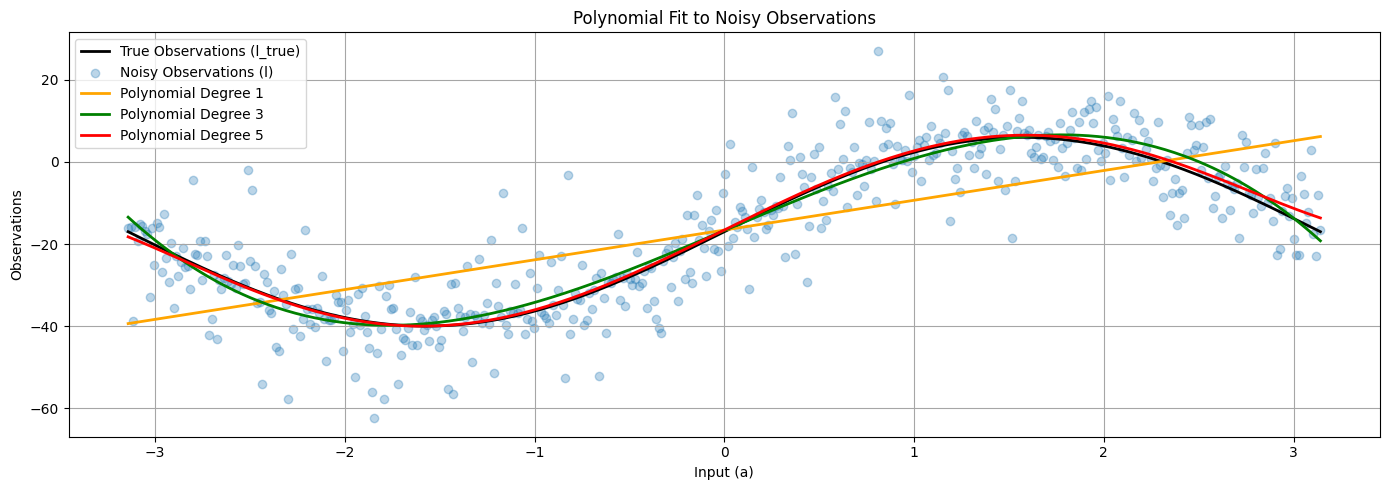

In [ ]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

import matplotlib.pyplot as plt
#Plotting the polynomial functions and observations
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))
# Plotting the true observations
ax.plot(a, l_true, label='True Observations (l_true)', color='k', linewidth=2)

# Plotting the noisy observations
ax.scatter(a, l, label='Noisy Observations (l)', color='tab:blue', marker='o', alpha=0.3)

# Plotting the polynomial functions
ax.plot(a, line_uw, label='Polynomial Degree 1', color='orange', linewidth=2)
ax.plot(a, cubic_uw, label='Polynomial Degree 3', color='green', linewidth=2)
ax.plot(a, quintic_uw, label='Polynomial Degree 5', color='red', linewidth=2)

# Adding labels and title
ax.set_xlabel('Input (a)')
ax.set_ylabel('Observations')
ax.set_title('Polynomial Fit to Noisy Observations')

# Adding grid
ax.grid(True, which='both', ls='-', color='0.65')
# Adding legend
ax.legend()
# Tight layout for better spacing
fig.tight_layout()

# Show the plot
plt.show()


In [ ]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)
# ...
for result in results:
    degree = result['degree']
    apv = result['posteriori_variance']
    print(f"A Posteriori Variance Factor for Polynomial Degree {degree}: {apv:.3f}")

A Posteriori Variance Factor for Polynomial Degree 1: 162.743
A Posteriori Variance Factor for Polynomial Degree 3: 66.132
A Posteriori Variance Factor for Polynomial Degree 5: 63.758


In [ ]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)
# ...
for result in results:
    degree = result['degree']
    if degree == 1:
        predicted = line_uw
    elif degree == 3:
        predicted = cubic_uw
    elif degree == 5:
        predicted = quintic_uw

    # Compute the norm (Euclidean distance)
    norm_value = np.linalg.norm(predicted - l_true)
    # Print the norm value
    print(f"Norm between predicted observations and true observations for Polynomial Degree {degree}: {norm_value:.3f}")

Norm between predicted observations and true observations for Polynomial Degree 1: 229.060
Norm between predicted observations and true observations for Polynomial Degree 3: 38.286
Norm between predicted observations and true observations for Polynomial Degree 5: 17.370


In [ ]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)

comment=[
          "A posteriori variance factor and norm both decrease as the polynomial degree increases, indicating improved model fit to the true observations;"
          "however, this trend highlights the risk of overfitting with higher-degree polynomials, which may capture noise rather than the underlying data pattern."
]
print(comment)

['A posteriori variance factor and norm both decrease as the polynomial degree increases, indicating improved model fit to the true observations;however, this trend highlights the risk of overfitting with higher-degree polynomials, which may capture noise rather than the underlying data pattern.']


In [ ]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)
P = np.diag(l_var)
print (P)

[[ 36.   0.   0. ...   0.   0.   0.]
 [  0. 144.   0. ...   0.   0.   0.]
 [  0.   0. 169. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...  25.   0.   0.]
 [  0.   0.   0. ...   0.  64.   0.]
 [  0.   0.   0. ...   0.   0.   4.]]



Fitting Polynomial of Degree 1 (Weighted):
Design Matrix (A):
[[ 1.         -3.14159265]
 [ 1.         -3.1290011 ]
 [ 1.         -3.11640955]
 [ 1.         -3.10381799]
 [ 1.         -3.09122644]
 [ 1.         -3.07863488]
 [ 1.         -3.06604333]
 [ 1.         -3.05345178]
 [ 1.         -3.04086022]
 [ 1.         -3.02826867]
 [ 1.         -3.01567712]
 [ 1.         -3.00308556]
 [ 1.         -2.99049401]
 [ 1.         -2.97790246]
 [ 1.         -2.9653109 ]
 [ 1.         -2.95271935]
 [ 1.         -2.94012779]
 [ 1.         -2.92753624]
 [ 1.         -2.91494469]
 [ 1.         -2.90235313]
 [ 1.         -2.88976158]
 [ 1.         -2.87717003]
 [ 1.         -2.86457847]
 [ 1.         -2.85198692]
 [ 1.         -2.83939536]
 [ 1.         -2.82680381]
 [ 1.         -2.81421226]
 [ 1.         -2.8016207 ]
 [ 1.         -2.78902915]
 [ 1.         -2.7764376 ]
 [ 1.         -2.76384604]
 [ 1.         -2.75125449]
 [ 1.         -2.73866293]
 [ 1.         -2.72607138]
 [ 1.         -2.71

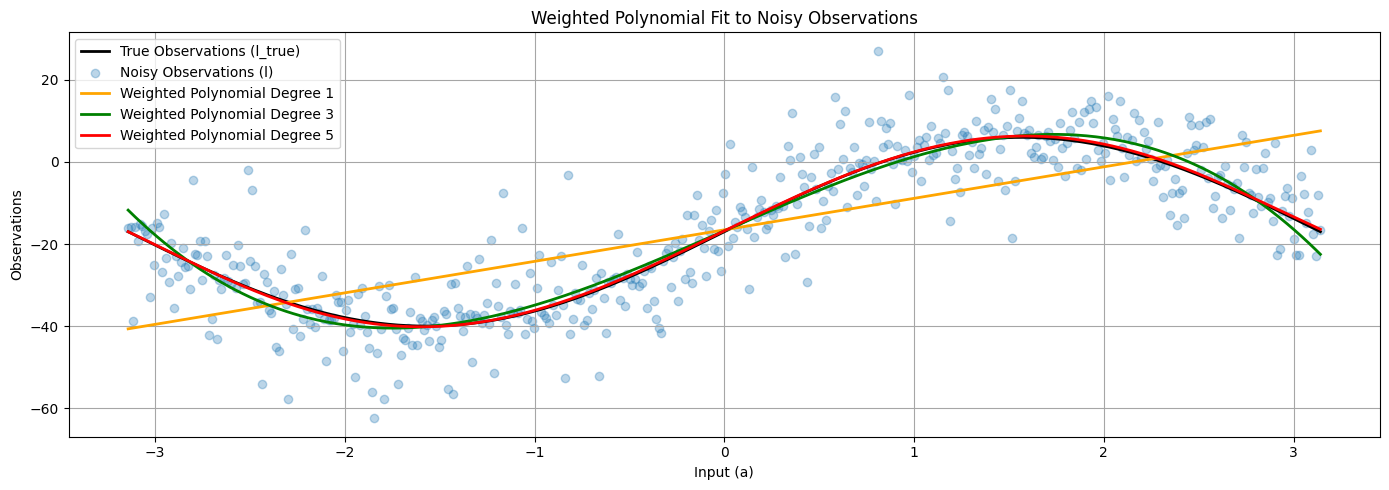

A Posteriori Variance Factor (Weighted) for Polynomial Degree 1: 12.055
A Posteriori Variance Factor (Weighted) for Polynomial Degree 3: 1.144
A Posteriori Variance Factor (Weighted) for Polynomial Degree 5: 0.945
Norm between predicted observations and true observations for Weighted Polynomial Degree 1: 230.678
Norm between predicted observations and true observations for Weighted Polynomial Degree 3: 36.070
Norm between predicted observations and true observations for Weighted Polynomial Degree 5: 5.742


In [ ]:
## step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)
# ...
# Step 6 to Step 10 combined using the proper P matrix

# Update P matrix based on observation variances (proper P matrix)
P_weighted = np.diag(1 / l_var)

# Initialize a list to store results for each degree
results_weighted = []

# Define the polynomial degrees to test
degrees = [1, 3, 5]

# Call the fit_polynomial_curve function for each degree using the weighted P matrix
for deg in degrees:
    print(f"\nFitting Polynomial of Degree {deg} (Weighted):")
    x_weighted, cov_x_weighted, apv_weighted, v_weighted = fit_polynomial_curve(a, l, P_weighted, deg)

    # Store the results for each degree
    results_weighted.append({
        'degree': deg,
        'coefficients': x_weighted,
        'covariance': cov_x_weighted,
        'posteriori_variance': apv_weighted,
        'residuals': v_weighted
    })

# Step 7: Construct polynomial functions for each degree
line_coeffs_weighted = results_weighted[0]['coefficients']
cubic_coeffs_weighted = results_weighted[1]['coefficients']
quintic_coeffs_weighted = results_weighted[2]['coefficients']

line_w = np.polyval(line_coeffs_weighted[::-1], a)
cubic_w = np.polyval(cubic_coeffs_weighted[::-1], a)
quintic_w = np.polyval(quintic_coeffs_weighted[::-1], a)

# Step 8: Plot the weighted polynomial functions and observations
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# Plot true observations
ax.plot(a, l_true, label='True Observations (l_true)', color='k', linewidth=2)

# Plot noisy observations
ax.scatter(a, l, label='Noisy Observations (l)', color='tab:blue', marker='o', alpha=0.3)

# Plot weighted polynomial functions
ax.plot(a, line_w, label='Weighted Polynomial Degree 1', color='orange', linewidth=2)
ax.plot(a, cubic_w, label='Weighted Polynomial Degree 3', color='green', linewidth=2)
ax.plot(a, quintic_w, label='Weighted Polynomial Degree 5', color='red', linewidth=2)

# Add labels, title, and legend
ax.set_xlabel('Input (a)')
ax.set_ylabel('Observations')
ax.set_title('Weighted Polynomial Fit to Noisy Observations')
ax.grid(True, which='both', ls='-', color='0.65')
ax.legend()
fig.tight_layout()
plt.show()

# Step 9: Print the a posteriori variance factors for weighted LSE polynomials
for result in results_weighted:
    degree = result['degree']
    apv_weighted = result['posteriori_variance']
    print(f"A Posteriori Variance Factor (Weighted) for Polynomial Degree {degree}: {apv_weighted:.3f}")

# Step 10: Compute and print the norm between predicted and true observations for weighted polynomials
for result in results_weighted:
    degree = result['degree']
    if degree == 1:
        predicted_weighted = line_w
    elif degree == 3:
        predicted_weighted = cubic_w
    elif degree == 5:
        predicted_weighted = quintic_w

    norm_value_weighted = np.linalg.norm(predicted_weighted - l_true)
    print(f"Norm between predicted observations and true observations for Weighted Polynomial Degree {degree}: {norm_value_weighted:.3f}")

In [ ]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)
# ...
#Define the proper P matrix using the variances
P = np.diag(l_var)  # Create a diagonal weight matrix from variances

#Call the fit_polynomial_curve function and fetch the results
results_weighted = []
degrees = [1, 3, 5]  # Degrees of the polynomial to fit

for deg in degrees:
    x, cov_x, apv, v = fit_polynomial_curve(a, l, P, deg)
    results_weighted.append({
        'degree': deg,
        'coefficients': x,
        'covariance': cov_x,
        'posteriori_variance': apv,
        'residuals': v
    })

#Compute and print the norm between predicted observations and true observations
for result in results_weighted:
    degree = result['degree']
    if degree == 1:
        predicted = np.polyval(result['coefficients'][::-1], a)
    elif degree == 3:
        predicted = np.polyval(result['coefficients'][::-1], a)
    elif degree == 5:
        predicted = np.polyval(result['coefficients'][::-1], a)

    # Compute the norm (Euclidean distance)
    norm_value = np.linalg.norm(predicted - l_true)

    # Print the norm value
    print(f"Norm between predicted observations and true observations for Polynomial Degree {degree}: {norm_value:.4f}")

Design Matrix (A):
[[ 1.         -3.14159265]
 [ 1.         -3.1290011 ]
 [ 1.         -3.11640955]
 [ 1.         -3.10381799]
 [ 1.         -3.09122644]
 [ 1.         -3.07863488]
 [ 1.         -3.06604333]
 [ 1.         -3.05345178]
 [ 1.         -3.04086022]
 [ 1.         -3.02826867]
 [ 1.         -3.01567712]
 [ 1.         -3.00308556]
 [ 1.         -2.99049401]
 [ 1.         -2.97790246]
 [ 1.         -2.9653109 ]
 [ 1.         -2.95271935]
 [ 1.         -2.94012779]
 [ 1.         -2.92753624]
 [ 1.         -2.91494469]
 [ 1.         -2.90235313]
 [ 1.         -2.88976158]
 [ 1.         -2.87717003]
 [ 1.         -2.86457847]
 [ 1.         -2.85198692]
 [ 1.         -2.83939536]
 [ 1.         -2.82680381]
 [ 1.         -2.81421226]
 [ 1.         -2.8016207 ]
 [ 1.         -2.78902915]
 [ 1.         -2.7764376 ]
 [ 1.         -2.76384604]
 [ 1.         -2.75125449]
 [ 1.         -2.73866293]
 [ 1.         -2.72607138]
 [ 1.         -2.71347983]
 [ 1.         -2.70088827]
 [ 1.    

In [ ]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)
#result
Answer14= [
    "The weighted least squares estimation (LSE) typically yields lower a posteriori variance factors and norms compared to the unweighted LSE,"
    "indicating a better fit to the true observations by accounting for the varying reliability of the data. "
    "This phenomenon occurs because the weighted approach mitigates the influence of noisy observations and outliers,"
     "allowing the model to focus on more reliable data points for a more accurate representation of the underlying relationship."
]
print(Answer14)

['The weighted least squares estimation (LSE) typically yields lower a posteriori variance factors and norms compared to the unweighted LSE,indicating a better fit to the true observations by accounting for the varying reliability of the data. This phenomenon occurs because the weighted approach mitigates the influence of noisy observations and outliers,allowing the model to focus on more reliable data points for a more accurate representation of the underlying relationship.']


# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

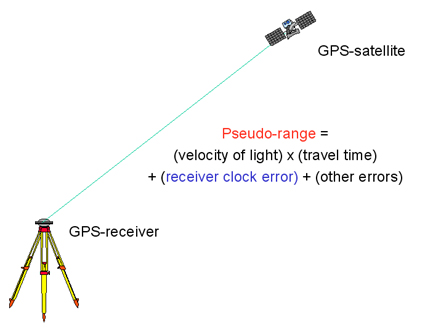

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [ ]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
import pandas as pd
import numpy as np

df_pseudorange = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2/pseudoranges.xlsx')
df_sat_pos = pd.read_excel('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment2/satellite_position.xlsx')

pseudorange = df_pseudorange.to_numpy()
sat_pos = df_sat_pos.to_numpy()

# Display the NumPy arrays
print("Pseudorange Array:\n", pseudorange)
print("Satellite Positions Array:\n", sat_pos)

Pseudorange Array:
 [[7.00000000e+00 2.29197410e+07]
 [8.00000000e+00 2.04598941e+07]
 [1.10000000e+01 2.24003384e+07]
 [1.50000000e+01 2.28291409e+07]
 [1.70000000e+01 2.23420148e+07]
 [1.80000000e+01 2.56464545e+07]
 [1.90000000e+01 2.38147762e+07]
 [2.40000000e+01 2.43113993e+07]
 [2.60000000e+01 2.13536401e+07]
 [2.70000000e+01 2.49716096e+07]
 [2.80000000e+01 2.06389811e+07]]
Satellite Positions Array:
 [[ 7.00000000e+00  5.28079174e+06 -2.55014601e+07  4.64950829e+06]
 [ 8.00000000e+00 -2.15965605e+06 -2.11160248e+07  1.55979092e+07]
 [ 1.10000000e+01  1.03718522e+07 -2.17131113e+07  1.05586870e+07]
 [ 1.50000000e+01 -1.60857608e+07  4.28507122e+06  2.07420421e+07]
 [ 1.70000000e+01 -1.43129881e+07 -2.20450143e+07  4.67120840e+06]
 [ 1.80000000e+01 -2.43571819e+06  1.62572051e+07  2.10997795e+07]
 [ 1.90000000e+01  1.59124672e+07 -3.46251531e+06  2.10536283e+07]
 [ 2.40000000e+01  1.62718482e+07 -2.18766320e+05  2.10353327e+07]
 [ 2.60000000e+01 -1.92470355e+07 -7.25980368e+06  1

In [ ]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)
# Number of measurements (n) is the number of rows in the pseudorange array
n = pseudorange.shape[0]

# Number of states (m) is 4: x, y, z (position) and clock bias
m = 4

# Display results
print(f"Number of measurements (n): {n}")
print(f"Number of states (m): {m}")

Number of measurements (n): 11
Number of states (m): 4


In [ ]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)

# Number of observations (satellites)
n = 11

# Define the weight matrix P as an identity matrix of size n
P = np.eye(n)

print(P)


[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
# step 4
# set the initial states as zeros:
# (1 mark)
m = 4

# Initialize the state vector as zeros
x_0 = np.zeros(m)

# Display the initial state vector
print("Initial State Vector (x_0):")
print(x_0)

Initial State Vector (x_0):
[0. 0. 0. 0.]


In [ ]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

In [ ]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
delta = np.ones(4)
i = 0
arr_w = []
arr_delta=[]
arr_err_pos = []
arr_i = []
x_hat = x_0.copy()

# Display initialized variables
print("Initial corrections (delta):", delta)
print("Iteration counter (i):", i)
print("Initial x_hat:", x_hat)

Initial corrections (delta): [1. 1. 1. 1.]
Iteration counter (i): 0
Initial x_hat: [0. 0. 0. 0.]


In [ ]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)
def euclidean_norm(receiver_pos, satellite_pos):
  distance = np.linalg.norm(satellite_pos - receiver_pos, axis=1)
  return distance

GroundTruth = receiver_pos
sat_pos = satellite_pos

# Get distances
distances = euclidean_norm(receiver_pos, satellite_pos[:, 1:])  # Exclude the first column (ID)
print("Distances between receiver and satellites:", distances)


Distances between receiver and satellites: [22919735.50416796 20459891.58181501 22400334.25542599 22829138.20273155
 22342011.77899318 25646450.14718576 23814770.16593441 24311391.26510924
 21353638.3890343  24971604.82362354 20638980.11687546]


In [ ]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
def design_matrix(r_pos, s_pos, rho):
    """Compute the design matrix A for the least squares estimation problem.

    Parameters:
    r_pos (np.array): Estimated receiver position as a 1D array [x, y, z].
    s_pos (np.array): Satellites positions as a 2D array of shape (n, 3), where n is the number of satellites.
    rho (np.array): Geometric distances between the estimated receiver and the satellites, shape (n,).

    Returns:
    np.array: The design matrix A with shape (n, 4)."""
    n = s_pos.shape[0]

    # Initialize the design matrix A with zeros (n rows and 4 columns).
    A = np.zeros((n, 4))

    # Compute partial derivatives for each satellite
    for i in range(n):
        dx = r_pos[0] - s_pos[i][0]
        dy = r_pos[1] - s_pos[i][1]
        dz = r_pos[2] - s_pos[i][2]
        distance = rho[i]

        # Fill the design matrix with computed partial derivatives
        A[i, 0] = -dx / distance
        A[i, 1] = -dy / distance
        A[i, 2] = -dz / distance
        A[i, 3] = 1  # Bias term

    return A

In [ ]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)

tolerance = 0.001
max_iterations = 1000  # to avoid infinite loop
i = 0
while np.linalg.norm(delta[:3]) > tolerance:# Convergence criteria on receiver position
    # Compute the geometric distances between Satellites and receiver
    rho = np.linalg.norm(sat_pos[:, 1:4] - x_hat[:3], axis=1)

    # Compute the design matrix A
    A = design_matrix(x_hat, sat_pos, rho)

    # Compute the misclosure array w (observed - computed)
    w = pseudorange[:, 1] - (rho + x_hat[3])  # Adjusting for clock bias

    # Compute the corrections delta using Least Squares
    try:
        delta = np.linalg.inv(A.T @ A) @ A.T @ w
    except np.linalg.LinAlgError:
        print("Design matrix A is singular or not full rank")
        break  # exit loop if singular

    # Update the states (receiver position and clock bias)
    x_hat += delta

    # Compute the position error using the updated states against the ground truth
    err_pos = np.linalg.norm(x_hat[:3] - GroundTruth)

    # Update the iteration counter
    i += 1

    # Store the misclosure, delta, position error, and counter from each iteration into arrays
    arr_w.append(w)
    arr_delta.append(delta)
    arr_err_pos.append(err_pos)
    arr_i.append(i)

# After convergence, compute the A Posteriori Variance of Unit Weight
apv = (w.T @ w) / (n - m)

# Compute the Covariance matrix of estimated states
try:
    C_x_hat = np.linalg.inv(A.T @ A)
except np.linalg.LinAlgError:
    print("Design matrix A.T @ A is singular. Using pseudo-inverse instead.")
    C_x_hat = np.linalg.pinv(A.T @ A)

# Output results
print("Final Estimated States (x_hat):", x_hat)
print("A Posteriori Variance of Unit Weight (apv):", apv)
print("Covariance Matrix of Estimated States (C_x_hat):", C_x_hat)

Design matrix A is singular or not full rank
Design matrix A.T @ A is singular. Using pseudo-inverse instead.
Final Estimated States (x_hat): [-8.07398446e+16  9.67836845e+16  3.00059642e+17 -7.85813951e+16]
A Posteriori Variance of Unit Weight (apv): 9.577418823732285e+34
Covariance Matrix of Estimated States (C_x_hat): [[ 0.00139874 -0.00167669 -0.00519825  0.00563823]
 [-0.00167669  0.00200986  0.0062312  -0.0067586 ]
 [-0.00519825  0.0062312   0.01931867 -0.02095377]
 [ 0.00563823 -0.0067586  -0.02095377  0.02272727]]


In [ ]:
# step 10
estimated_states = x_hat  # Estimated states after convergence
corrections_array = delta  # Corrections applied
estimated_measurements_residuals = w  # Misclosure array

output = {
    "Estimated States": estimated_states,
    "Corrections Array": corrections_array,
    "Estimated Measurements Residuals": estimated_measurements_residuals,
    "A Posteriori Variance of Unit Weight": apv,
    "Covariance Matrix of Estimated States": C_x_hat,
    "Number of Iterations": i,  # Counter for iterations
    "3-D Position Errors": err_pos}  # Position error from ground truth

# Print the output to the console
print(output)

#after the LSE convergence to the console.
# (7 marks)


{'Estimated States': array([-8.07398446e+16,  9.67836845e+16,  3.00059642e+17, -7.85813951e+16]), 'Corrections Array': array([ 2.45410519e+16,  3.67698724e+16,  2.92719627e+17, -5.53608552e+16]), 'Estimated Measurements Residuals': array([-2.46874889e+17, -2.46874889e+17, -2.46874889e+17, -2.46874889e+17,
       -2.46874889e+17, -2.46874889e+17, -2.46874889e+17, -2.46874889e+17,
       -2.46874889e+17, -2.46874889e+17, -2.46874889e+17]), 'A Posteriori Variance of Unit Weight': 9.577418823732285e+34, 'Covariance Matrix of Estimated States': array([[ 0.00139874, -0.00167669, -0.00519825,  0.00563823],
       [-0.00167669,  0.00200986,  0.0062312 , -0.0067586 ],
       [-0.00519825,  0.0062312 ,  0.01931867, -0.02095377],
       [ 0.00563823, -0.0067586 , -0.02095377,  0.02272727]]), 'Number of Iterations': 10, '3-D Position Errors': 3.2545628384764275e+17}


In [ ]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)

Both the covariance matrix and the computed A Posteriori Variance of Unit Weight point to substantial uncertainty and possible correlation among the estimated states. When combined with a high APV, the high magnitudes in the estimated states raise the possibility that the estimates are not accurate. To improve the accuracy and dependability of the position estimates, more research into the measurement procedure, potential sources of noise, or modifications to the modelling strategy may be necessary. The covariance matrix's indication of interdependencies emphasizes even more how important it is to analyze the state estimates using a comprehensive strategy.

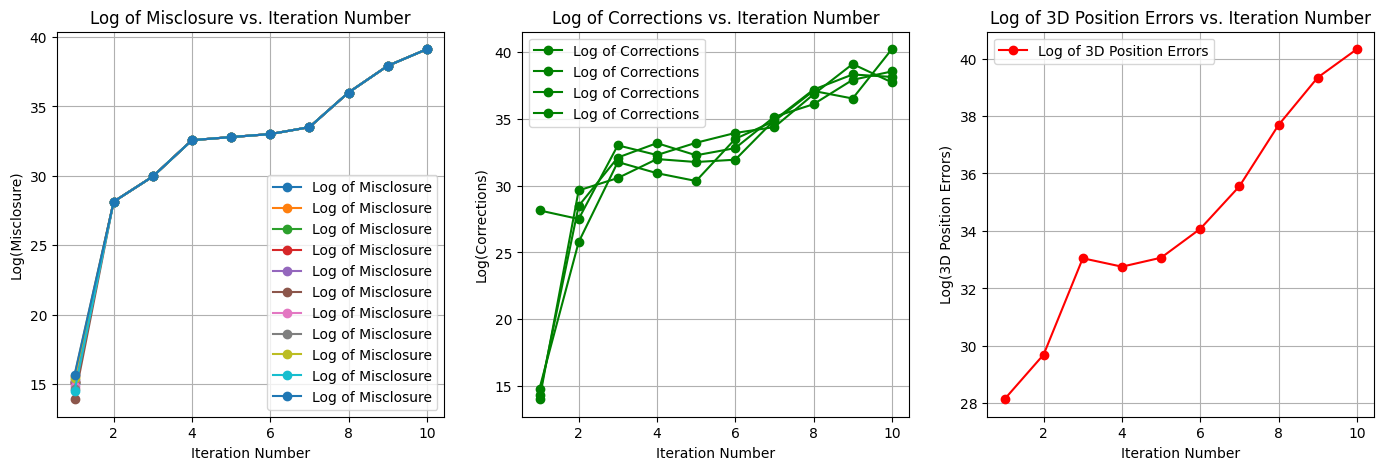

In [ ]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)
plt.figure(figsize=(17, 5))

plt.subplot(1, 3, 1)
plt.plot(arr_i, np.log(np.abs(arr_w)), marker='o', label='Log of Misclosure')
plt.title('Log of Misclosure vs. Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('Log(Misclosure)')
plt.grid(True)
plt.legend()

# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)
plt.subplot(1, 3, 2)
plt.plot(arr_i, np.log(np.abs(arr_delta)), marker='o', color='green', label='Log of Corrections')
plt.title('Log of Corrections vs. Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('Log(Corrections)')
plt.grid(True)
plt.legend()

# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)
plt.subplot(1, 3, 3)
plt.plot(arr_i, np.log(np.abs(arr_err_pos)), marker='o', color='red', label='Log of 3D Position Errors')
plt.title('Log of 3D Position Errors vs. Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('Log(3D Position Errors)')
plt.grid(True)
plt.legend()

In [ ]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)

**Log of Misclosure:** There is a declining trend in the misclosure w log. This shows convergence, which means that as the misclosure reduces, the estimated receiver location gets more precise, indicating that the observed pseudoranges are more closely aligned with the expected values.

**Log of Corrections:** The correction log Δ displays a declining trend as well. Larger corrections initially decrease as the estimation gets more accurate. This implies that the location estimate is being stabilized by the algorithm, with smaller adjustments made as it gets closer to the actual value.

**Log of 3D Position Errors:** Over iterations, the log of 3D position errors gets smaller. This indicates as the iterations go on, the positional estimation error is decreasing, suggesting that the estimated position is approaching the actual ground truth.

In [ ]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!


Estimated receiver's position is Latitude : 51.07088   deg N, Longitude : 24589951   deg E, Height : 6359932214.5 m.
The coordinates correspond to a location in Canada, specifically in the province of Alberta, which is near the city of Calgary.